In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import random as python_random

In [2]:
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [3]:
train = pd.read_csv('data/train_merged.csv', parse_dates=['date'], low_memory=False)
test = pd.read_csv('data/test_merged.csv', parse_dates=['date'], low_memory=False)

In [4]:
train.earthquake.fillna('', inplace=True)
train.event_name.fillna('', inplace=True)
train.national_holiday.fillna('', inplace=True)
train.regional_holiday.fillna('', inplace=True)
train.local_holiday.fillna('', inplace=True)
train.work_day_name.fillna('', inplace=True)

test.earthquake.fillna('', inplace=True)
test.event_name.fillna('', inplace=True)
test.national_holiday.fillna('', inplace=True)
test.regional_holiday.fillna('', inplace=True)
test.local_holiday.fillna('', inplace=True)
test.work_day_name.fillna('', inplace=True)

In [5]:
train.drop('transactions', axis=1, inplace=True)
test.drop('transactions', axis=1, inplace=True)

In [6]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,earthquake,event_name,national_holiday,regional_holiday,local_holiday,year,month,day,day_of_week,payday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False


In [7]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,oil_price,...,earthquake,event_name,national_holiday,regional_holiday,local_holiday,year,month,day,day_of_week,payday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False


In [8]:
full_data = pd.concat([train, test])

In [9]:
cat_features = [
    'family', 'store_nbr', 'city', 'state', 'cluster',
    'earthquake', 'event_name', 'national_holiday', 'regional_holiday', 'local_holiday',
    'payday', 'type', 'work_day_name',
]
full_data_encoded = pd.get_dummies(full_data, columns=cat_features)
full_data_encoded['family'] = full_data.family
full_data_encoded['store_nbr'] = full_data.store_nbr

In [10]:
test_border_date = test.date.unique()[0]
valid_border_date = train.date.unique()[-31]
train_data = full_data_encoded[full_data_encoded.date < valid_border_date]
valid_data = full_data_encoded[(full_data_encoded.date >= valid_border_date) & (full_data_encoded.date < test_border_date)]
test_data = full_data_encoded[full_data_encoded.date >= test_border_date]

In [11]:
train_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,family,store_nbr
0,0,2013-01-01,0.0,0,93.14,2013,1,1,1,1,...,1,0,1,0,0,0,0,0,AUTOMOTIVE,1
1,1,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,1,0,1,0,0,0,0,0,BABY CARE,1
2,2,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,1,0,1,0,0,0,0,0,BEAUTY,1
3,3,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,1,0,1,0,0,0,0,0,BEVERAGES,1
4,4,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,1,0,1,0,0,0,0,0,BOOKS,1


In [12]:
valid_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,family,store_nbr
54549,2945646,2017-07-16,2.0,0,46.53,2017,7,16,6,1,...,1,0,1,0,0,0,0,0,AUTOMOTIVE,1
54550,2945647,2017-07-16,0.0,0,46.53,2017,7,16,6,0,...,1,0,1,0,0,0,0,0,BABY CARE,1
54551,2945648,2017-07-16,2.0,0,46.53,2017,7,16,6,0,...,1,0,1,0,0,0,0,0,BEAUTY,1
54552,2945649,2017-07-16,1079.0,34,46.53,2017,7,16,6,0,...,1,0,1,0,0,0,0,0,BEVERAGES,1
54553,2945650,2017-07-16,0.0,0,46.53,2017,7,16,6,0,...,1,0,1,0,0,0,0,0,BOOKS,1


In [13]:
test_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,family,store_nbr
0,3000888,2017-08-16,NaN,0,46.8,2017,8,16,2,1,...,1,0,1,0,0,0,0,0,AUTOMOTIVE,1
1,3000889,2017-08-16,NaN,0,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BABY CARE,1
2,3000890,2017-08-16,NaN,2,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BEAUTY,1
3,3000891,2017-08-16,NaN,20,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BEVERAGES,1
4,3000892,2017-08-16,NaN,0,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BOOKS,1


In [14]:
train_dates = train_data.date.unique()
valid_dates = valid_data.date.unique()
test_dates = test_data.date.unique()
print(f'Train from {train_dates[0]} to {train_dates[-1]}')
print(f'Valid from {valid_dates[0]} to {valid_dates[-1]}')
print(f'Test from {test_dates[0]} to {test_dates[-1]}')

Train from 2013-01-01T00:00:00.000000000 to 2017-07-15T00:00:00.000000000
Valid from 2017-07-16T00:00:00.000000000 to 2017-08-15T00:00:00.000000000
Test from 2017-08-16T00:00:00.000000000 to 2017-08-31T00:00:00.000000000


In [15]:
y_train = np.log(train_data[['sales']].values + 1)
y_valid = np.log(valid_data[['sales']].values + 1)

X_train = train_data.drop(['id', 'sales', 'year', 'date', 'family', 'store_nbr'], axis=1)
X_valid = valid_data.drop(['id', 'sales', 'year', 'date', 'family', 'store_nbr'], axis=1)

X_test = test_data.drop(['id', 'date', 'year', 'sales', 'family', 'store_nbr'], axis=1)

In [16]:
X_test.head()

,onpromotion,oil_price,month,day,day_of_week,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,type_B,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano
0,0,46.8,8,16,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,46.8,8,16,2,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2,46.8,8,16,2,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,20,46.8,8,16,2,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0,46.8,8,16,2,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train.values)

In [147]:
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

model = keras.Sequential([
    normalizer,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [148]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 259)              519       
 n)                                                              
                                                                 
 dense_45 (Dense)            (None, 256)               66560     
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                16448     
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                     

In [149]:
%%time
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

history = model.fit(
    X_train.values,
    y_train,
    batch_size=30000,
    validation_data=(X_valid, y_valid),
    epochs=29,
    use_multiprocessing=True,
)

Epoch 1/29
99/99 [==============================] - 9s 91ms/step - loss: 4.5258 - val_loss: 1.8790
Epoch 2/29
99/99 [==============================] - 9s 90ms/step - loss: 2.0648 - val_loss: 1.3568
Epoch 3/29
99/99 [==============================] - 9s 90ms/step - loss: 1.7070 - val_loss: 1.1569
Epoch 4/29
99/99 [==============================] - 9s 91ms/step - loss: 1.5644 - val_loss: 0.9340
Epoch 5/29
99/99 [==============================] - 9s 90ms/step - loss: 1.4719 - val_loss: 0.8724
Epoch 6/29
99/99 [==============================] - 9s 91ms/step - loss: 1.4050 - val_loss: 0.8350
Epoch 7/29
99/99 [==============================] - 9s 93ms/step - loss: 1.3445 - val_loss: 0.7314
Epoch 8/29
99/99 [==============================] - 9s 93ms/step - loss: 1.2929 - val_loss: 0.7117
Epoch 9/29
99/99 [==============================] - 9s 94ms/step - loss: 1.2434 - val_loss: 0.6486
Epoch 10/29
99/99 [==============================] - 9s 94ms/step - loss: 1.2020 - val_loss: 0.6307
Epoch 11/

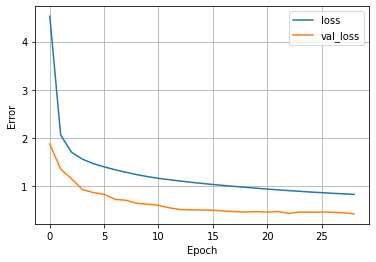

In [155]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [156]:
y_valid_pred = pd.Series(np.squeeze(model.predict(X_valid))).map(lambda x: max(x, 0))
mean_squared_error(y_valid, y_valid_pred, squared=False)

0.6551728705988878

In [157]:
valid_pred = valid_data.copy().reset_index()
valid_pred['sales_pred'] = np.exp(y_valid_pred) - 1
valid_pred[['sales', 'sales_pred']].head()

,sales,sales_pred
0,2.0,3.225754
1,0.0,0.211219
2,2.0,2.691846
3,1079.0,1837.630141
4,0.0,0.195848


In [158]:
for store_nbr in valid_data.store_nbr.unique():
    for family in valid_data.family.unique():
        cur_x = valid_data[(valid_data.store_nbr == store_nbr) & (valid_data.family == family)]
        if not cur_x.sales.any():
            valid_pred.loc[(valid_pred.store_nbr == store_nbr) & (valid_pred.family == family), 'sales_pred'] = 0.0

In [159]:
mean_squared_log_error(valid_pred[['sales']], valid_pred[['sales_pred']])

0.4259299861053853

In [160]:
valid_pred.groupby('family').apply(lambda x: mean_squared_log_error(x.sales, x.sales_pred))

family
AUTOMOTIVE                    0.379803
BABY CARE                     0.081419
BEAUTY                        0.424749
BEVERAGES                     0.185224
BOOKS                         0.012612
BREAD/BAKERY                  0.743628
CELEBRATION                   0.449558
CLEANING                      0.167951
DAIRY                         0.089116
DELI                          0.065420
EGGS                          0.723265
FROZEN FOODS                  0.482397
GROCERY I                     0.076191
GROCERY II                    0.841494
HARDWARE                      0.351724
HOME AND KITCHEN I            0.420090
HOME AND KITCHEN II           0.540955
HOME APPLIANCES               0.125022
HOME CARE                     0.163905
LADIESWEAR                    0.415293
LAWN AND GARDEN               0.988306
LINGERIE                      0.539022
LIQUOR,WINE,BEER              0.562258
MAGAZINES                     0.511055
MEATS                         0.771655
PERSONAL CARE     

In [161]:
full_data_products = []
for store_nbr in valid_pred.store_nbr.unique():
    for family in valid_pred.family.unique():
        cur_x = valid_pred[(valid_pred.store_nbr == store_nbr) & (valid_pred.family == family)]
        if cur_x.sales.any():
            full_data_products.append(cur_x)

In [162]:
len(full_data_products)

1672

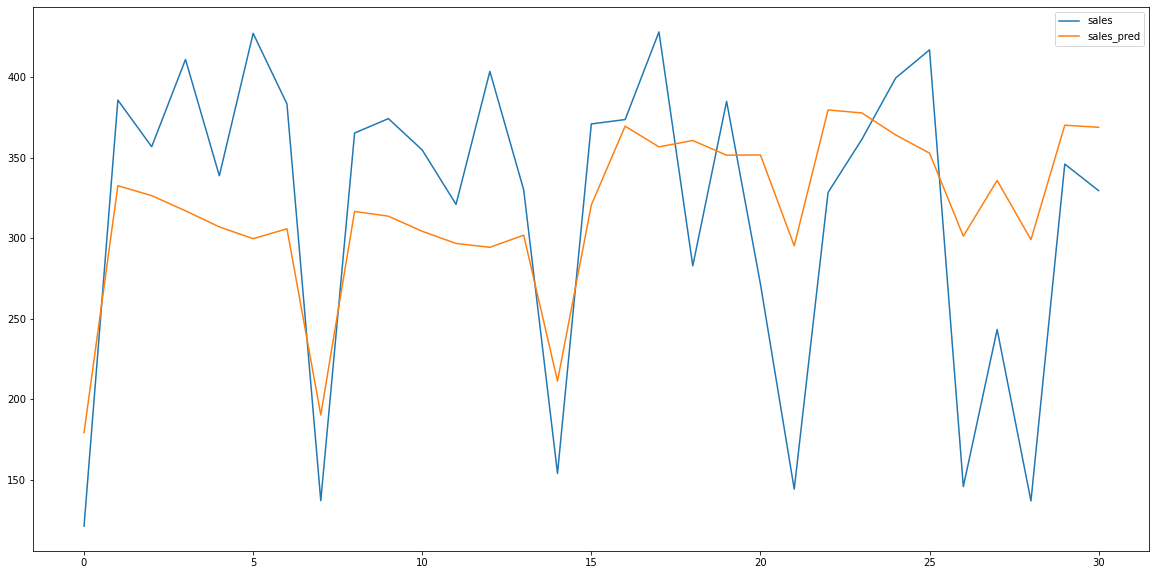

In [163]:
fig, ax = plt.subplots(figsize=(20, 10))
product = full_data_products[4]
X = list(range(0, len(product.sales)))
ax.plot(X, product.sales.values, label='sales')
ax.plot(X, product.sales_pred.values, label='sales_pred')
plt.legend(loc='upper right')
plt.show()

In [164]:
y_test_pred = pd.Series(np.squeeze(model.predict(X_test))).map(lambda x: max(x, 0))
pred = test_data.copy()
pred['sales'] = np.exp(y_test_pred) - 1
pred.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,family,store_nbr
0,3000888,2017-08-16,3.383935,0,46.8,2017,8,16,2,1,...,1,0,1,0,0,0,0,0,AUTOMOTIVE,1
1,3000889,2017-08-16,0.225279,0,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BABY CARE,1
2,3000890,2017-08-16,3.781554,2,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BEAUTY,1
3,3000891,2017-08-16,1784.795762,20,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BEVERAGES,1
4,3000892,2017-08-16,0.212290,0,46.8,2017,8,16,2,0,...,1,0,1,0,0,0,0,0,BOOKS,1


In [165]:
for store_nbr in train_data.store_nbr.unique():
    for family in train_data.family.unique():
        cur_x = train_data[(train_data.store_nbr == store_nbr) & (train_data.family == family)]
        if not cur_x.sales.any():
            pred.loc[(pred.store_nbr == store_nbr) & (pred.family == family), 'sales'] = 0.0

In [166]:
sub = test[['id']].copy()
sub['sales'] = pred.sales
sub.head()

,id,sales
0,3000888,3.383935
1,3000889,0.000000
2,3000890,3.781554
3,3000891,1784.795762
4,3000892,0.212290


In [167]:
sub.to_csv('data/submission_nn.csv', index=False)